In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
os.chdir('./Data')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [4]:
df2 = pd.read_csv('Car details v3.csv',usecols = df.columns)
df2.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape,df2.shape

((4340, 8), (8128, 8))

# Concat the datframes

In [6]:
df = pd.concat([df,df2])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner


In [7]:
df['name'] = df['name'].transform(lambda x: ' '.join(x.split()[0:2]))

In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
8123,Hyundai i20,2013,320000,110000,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift,2009,382000,120000,Diesel,Individual,Manual,First Owner
8126,Tata Indigo,2013,290000,25000,Diesel,Individual,Manual,First Owner


In [9]:
df['Brand'] = df['name'].transform(lambda x : x.split()[0])

In [10]:
df.to_csv('Final_data.csv')

# Brief Univariate Data Analysis

In [11]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Brand            0
dtype: int64

In [12]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
Brand            object
dtype: object

<Axes: xlabel='transmission', ylabel='count'>

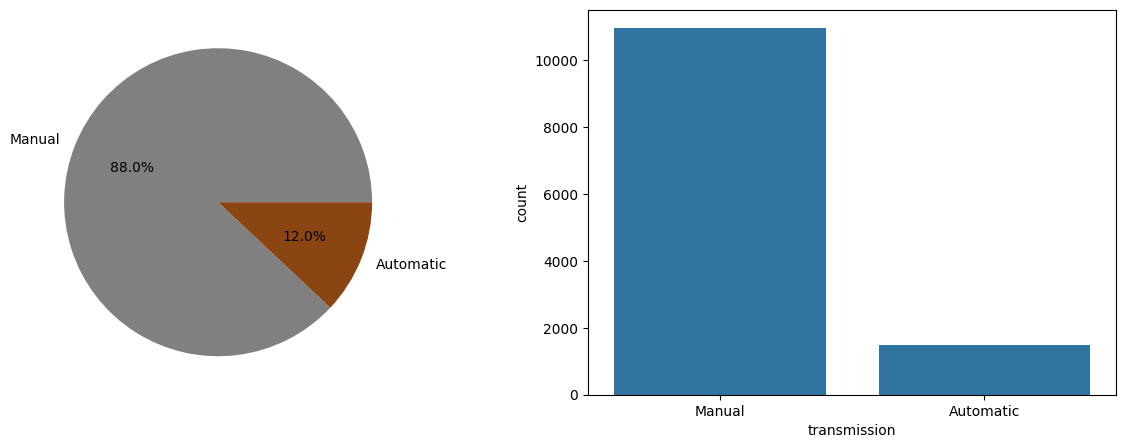

In [13]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
ax.pie(x = df['transmission'].value_counts(), 
        labels=df['transmission'].value_counts().index, autopct='%1.1f%%',
        colors=[ 'gray', 'saddlebrown'])
ax = plt.subplot(122)
sns.barplot(x=df['transmission'].value_counts().index ,y = df['transmission'].value_counts(),ax=ax)

In [14]:
idx = df.groupby('Brand').count()[df.groupby('Brand').count()['name']< 100].index
idx

Index(['Ambassador', 'Ashok', 'Daewoo', 'Fiat', 'Force', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mercedes-Benz', 'Mitsubishi',
       'Opel', 'OpelCorsa', 'Peugeot', 'Volvo'],
      dtype='object', name='Brand')

In [15]:
d= df.copy()
for inx,i  in df['Brand'].items():
    if i in idx.to_list():
        d.loc[d['Brand'] == i,'Brand'] = 'Others'

In [16]:
d[d['Brand'] == 'Others'] 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
29,Jaguar XF,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Others
30,Mercedes-Benz New,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Others
36,Mercedes-Benz New,2012,1375000,33800,Diesel,Dealer,Automatic,Second Owner,Others
40,Jeep Compass,2019,1400000,10000,Petrol,Individual,Manual,First Owner,Others
41,Mercedes-Benz E-Class,2010,850000,119000,Petrol,Dealer,Automatic,First Owner,Others
...,...,...,...,...,...,...,...,...,...
7919,Mercedes-Benz E-Class,2011,1600000,70000,Diesel,Individual,Automatic,First Owner,Others
7930,Volvo S90,2019,5500000,17000,Diesel,Individual,Automatic,First Owner,Others
8091,Fiat Linea,2010,125000,40000,Petrol,Individual,Manual,Second Owner,Others
8101,Fiat Grande,2012,450000,70000,Diesel,Individual,Manual,First Owner,Others


<Axes: xlabel='Brand', ylabel='count'>

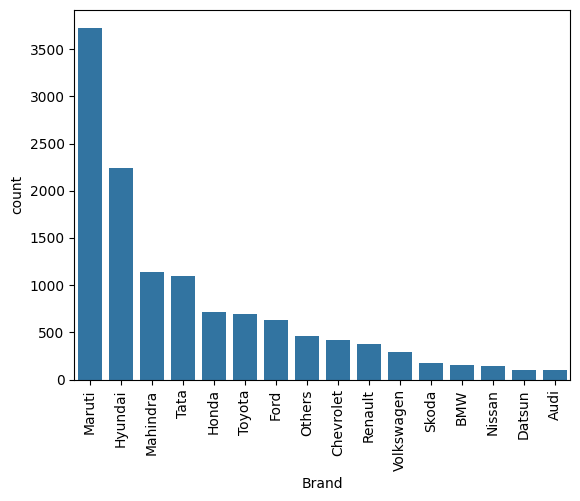

In [17]:
plt.xticks(rotation = 90)
sns.barplot(x=d['Brand'].value_counts().index ,y = d['Brand'].value_counts())

<Axes: xlabel='seller_type', ylabel='count'>

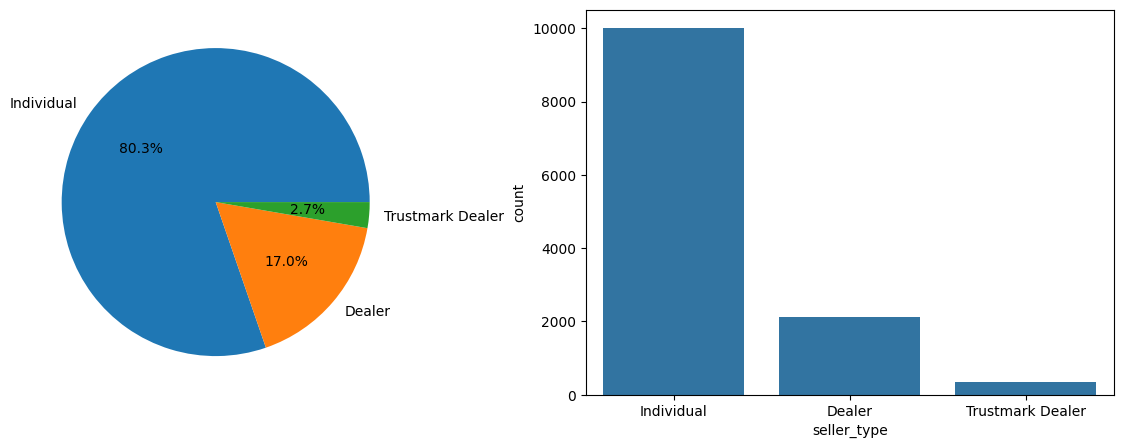

In [18]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
plt.pie(x = df['seller_type'].value_counts(), 
        labels=df['seller_type'].value_counts().index, autopct='%1.1f%%')
ax = plt.subplot(122)
sns.barplot(x=df['seller_type'].value_counts().index ,y = df['seller_type'].value_counts(),ax=ax)

<Axes: xlabel='year', ylabel='count'>

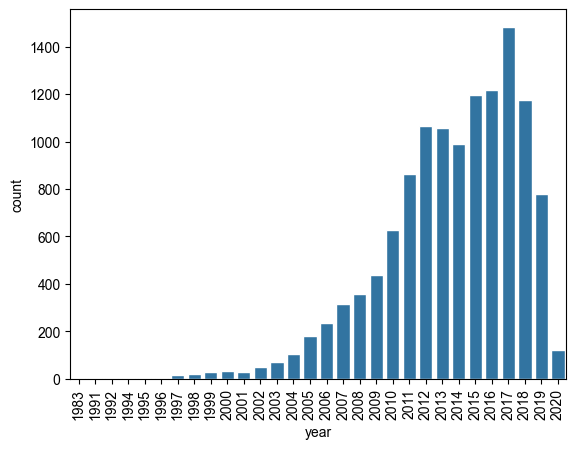

In [19]:
plt.xticks(rotation = 90)
sns.set_theme(context='notebook',style='darkgrid')
sns.barplot(x=df['year'].value_counts().index ,y = df['year'].value_counts())

In [20]:
d = df[df['km_driven']<10000]['km_driven']
d

27      5000
31      4500
88      9000
89      6500
101     9800
        ... 
7981    5500
7986    9500
8002    7000
8058    8000
8060    9599
Name: km_driven, Length: 623, dtype: int64

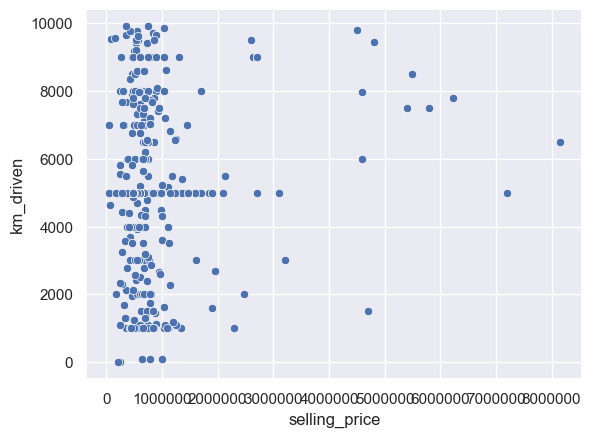

In [21]:
sns.scatterplot(x =  df[df['km_driven']<10000]['selling_price'],y=d)
plt.ticklabel_format(style='plain') 

# ML and Feature Engeenering

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [23]:
X_train, X_test ,y_train ,y_test  = train_test_split(df.drop('selling_price',axis=1),
                                                     df['selling_price'],test_size=0.2)

### One Hot Encoding and One Hot Encoding

In [24]:
ohe_oe =  ColumnTransformer([('tnf1',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),(0,3,4,5,7))
                         ,('tnf2',OrdinalEncoder(categories=[['Manual','Automatic'],['Test Drive Car','Fourth & Above Owner',
                                    'Third Owner','Second Owner' ,'First Owner']]),[5,6])]
                      ,remainder='passthrough')

### Linear Regression Using OLS

In [25]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Brand'],
      dtype='object')

In [26]:
lr = LinearRegression()

In [27]:
pipe = Pipeline([
        ('ohe',ohe_oe),
        ('lr',lr)
])

In [28]:
X_train[X_train['name'] == 'Chevrolet Trailblazer']

,name,year,km_driven,fuel,seller_type,transmission,owner,Brand
7335,Chevrolet Trailblazer,2016,46000,Diesel,Dealer,Automatic,Second Owner,Chevrolet


In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  (0, 3, 4, 5, 7)),
                                                 ('tnf2',
                                                  OrdinalEncoder(categories=[['Manual',
                                                                              'Automatic'],
                                                                             ['Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'First '
                                                                              'Owner']]),
                                                  [5, 6])])),
                ('lr', LinearRegression())])

In [30]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8521835606006949

# Exporting

In [31]:
import pickle

In [32]:
pickle.dump(pipe,open('model.pkl','wb'))

In [33]:
pipe.predict(pd.DataFrame([X_train.iloc[0,:]]))

array([811776.67345189])

# ALL DONE 

In [34]:
pd.DataFrame([(X_train.iloc[0,:])])

,name,year,km_driven,fuel,seller_type,transmission,owner,Brand
3876,Honda City,2015,58000,Petrol,Dealer,Automatic,First Owner,Honda


In [35]:
y_pred = pipe.predict(X_train)
y_pred

array([ 811776.67345189,   20574.36220887,   92959.74380197, ...,
        393299.78435314, -283055.50489812,  429645.66612658])

In [36]:
X_train.iloc[0,:]

name             Honda City
year                   2015
km_driven             58000
fuel                 Petrol
seller_type          Dealer
transmission      Automatic
owner           First Owner
Brand                 Honda
Name: 3876, dtype: object

<Axes: xlabel='km_driven', ylabel='selling_price'>

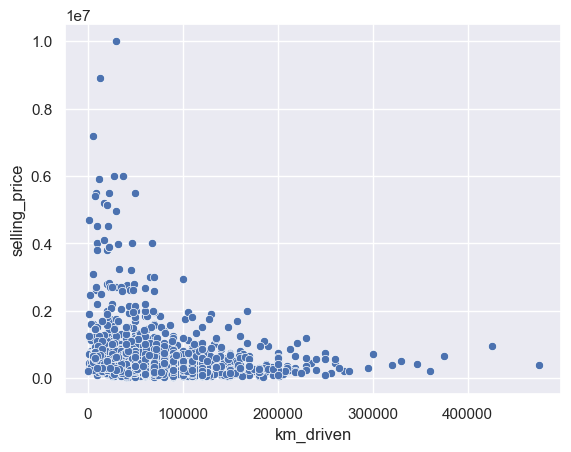

In [37]:
sns.scatterplot(x=X_test['km_driven'],y=y_test)
# sns.scatterplot(x=X_test['km_driven'],y=y_pred,color = 'red')

In [38]:
# sns.scatterplot(x=X_test['owner'],y=y_test)
# sns.scatterplot(x=X_test['owner'],y=y_pred,color = 'red')

#             END